#  Hebbian Learning

This notebook illustrates that the values of the weights of the neurons in lissom after some learning steps folllow hebbian learning. 

In [1]:
from pylissom.optim.optimizers import *
import torch
from pylissom.nn.modules.lissom import *
from pylissom.utils.plotting import *
from pylissom.utils.stimuli import *
import matplotlib.pyplot as plt


## Cortex layer

This example use a cortex layer of dimension 25x25.

In [2]:
in_features = 25**2
out_features = 25**2
cortex = Cortex(in_features, out_features, radius=5, sigma=5)

In [3]:
optimizer = CortexHebbian(cortex, 0.1)

### Input
The input in the retina is an oriented gaussian at 45$^o$.

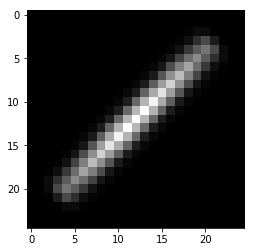

In [4]:
gauss_size = int(in_features**0.5)
gauss = gaussian_generator(gauss_size, gauss_size//2, gauss_size//2, 1, 9, 45)
plot_matrix(gauss)
inp = torch.autograd.Variable(torch.from_numpy(gauss).view(1, in_features))

In [5]:
inp.size()

torch.Size([1, 625])

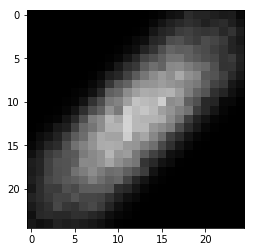

In [6]:
out_rows = int(out_features**0.5)
plot_tensor(cortex(inp*2.33).data, (out_rows,out_rows))

## Weights before training


The  figure below shows the initial  weights of the 25x25 Cortex layer. The weights are shown as circular white clouds because the neurons have circular receptive fields. The clouds are uniform because at the begining the weights are unselective.

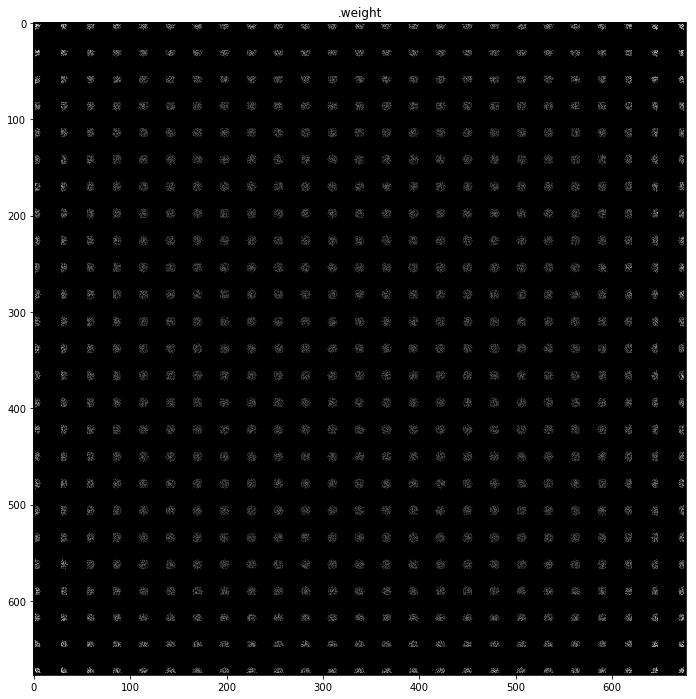

In [7]:
plt.figure(figsize=(12, 12))
plot_layer_weights(cortex, use_range=False)

In [8]:
optimizer.step()

## Weights after training

After training, we can see that the weights of the neurons where  the  Gaussian  was  inside  their  receptive  fields  follow  a  Hebbian  learning  pattern. The weights of the neurons whose receptive fields were inside or partially inside the input pattern become stronger because the input matched the output values,  reinforcing the connection and increasing the weights values.

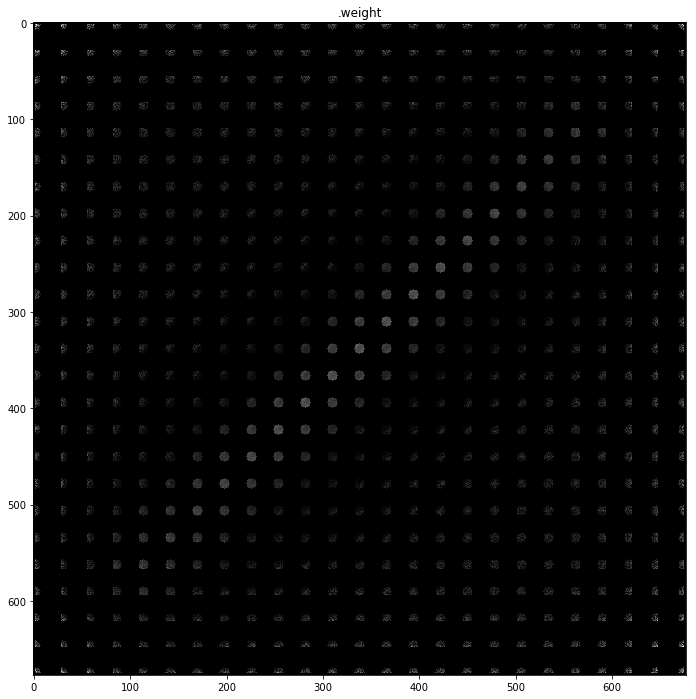

In [9]:
plt.figure(figsize=(12, 12))
plot_layer_weights(cortex, use_range=False)

## ReducedLissom

This example explores hebbian learning in a ReducedLissom. The ReducedLissom has 3 Cortex layers: afferent, inhibitory and excitatory, of dimension 36x36.

In [10]:
retinal_density = 36
lgn_density = retinal_density
cortical_density = 36
# Receptive Fields
radius_afferent = (lgn_density / 4 + 0.5)
radius_excitatory = (cortical_density / 10)
radius_inhibitory = cortical_density / 4 - 1
radius_gaussian_afferent = radius_afferent / 1.3
radius_gaussian_excitatory = 0.78 * radius_excitatory
radius_gaussian_inhibitory = 2.08 * radius_inhibitory
# Activation
settling_steps = 9
min_theta = 0.083
max_theta = min_theta + 0.55
# Scaling
afferent_factor = 1.0
excitatory_factor = 0.9
inhibitory_factor = 0.9

In [11]:
in_features = lgn_density**2
out_features = cortical_density**2
excitatory_map = Cortex(in_features, out_features, radius=radius_excitatory, sigma=radius_gaussian_excitatory)

In [12]:
in_features = cortical_density**2
out_features = cortical_density**2
afferent_map = Cortex(in_features, out_features, radius=radius_afferent, sigma=radius_gaussian_afferent)

In [13]:
in_features = cortical_density**2
out_features = cortical_density**2
inhibitory_map = Cortex(in_features, out_features, radius=radius_inhibitory, sigma=radius_gaussian_inhibitory)

In [14]:
v1 = ReducedLissom(afferent_module=afferent_map, excitatory_module=excitatory_map, inhibitory_module=inhibitory_map, 
                   min_theta=min_theta, max_theta=max_theta, settling_steps=settling_steps,
                  inhibitory_strength=inhibitory_factor, afferent_strength=afferent_factor, 
                   excitatory_strength=excitatory_factor)

In [15]:
excit_optimizer = CortexHebbian(excitatory_map, 0.5)
inhib_optimizer = CortexHebbian(inhibitory_map, 0.4)
aff_optimizer = CortexHebbian(afferent_map, 0.3)

In [16]:
seq = SequentialOptimizer(excit_optimizer, inhib_optimizer, aff_optimizer)

### Input

The input in retina is an oriented gaussian.

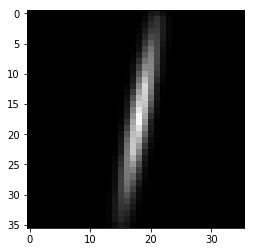

In [17]:
gauss_size = int(in_features**0.5)
gauss = gaussian_generator(gauss_size, gauss_size//2, gauss_size//2, 1, 9, 80)
plot_matrix(gauss)
inp = torch.autograd.Variable(torch.from_numpy(gauss).view(in_features)).unsqueeze(0)

In [18]:
in_features

1296

The following plot is the activation of the neurons:

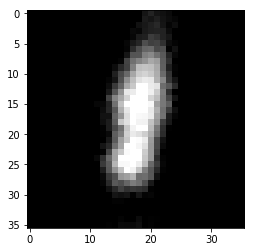

In [19]:
out_rows = int(out_features**0.5)
plot_tensor(v1(inp*2.33).data, (out_rows,out_rows))

## Weights before training


The  figures below show the initial weights of the 36x36 Cortex layer, for the inhibitory, excitatory and afferent layers. The weights are shown as circular white clouds because the neurons have circular receptive fields. The clouds are uniform because at the begining the weights are unselective. Note also that the excitatory layer has smaller clouds than the inhibitory layer, because the excitatory connections are short-range.

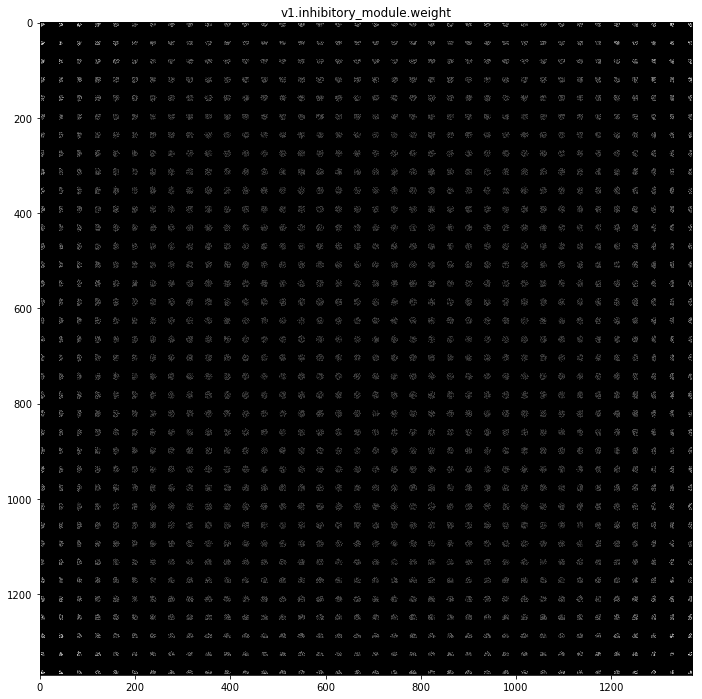

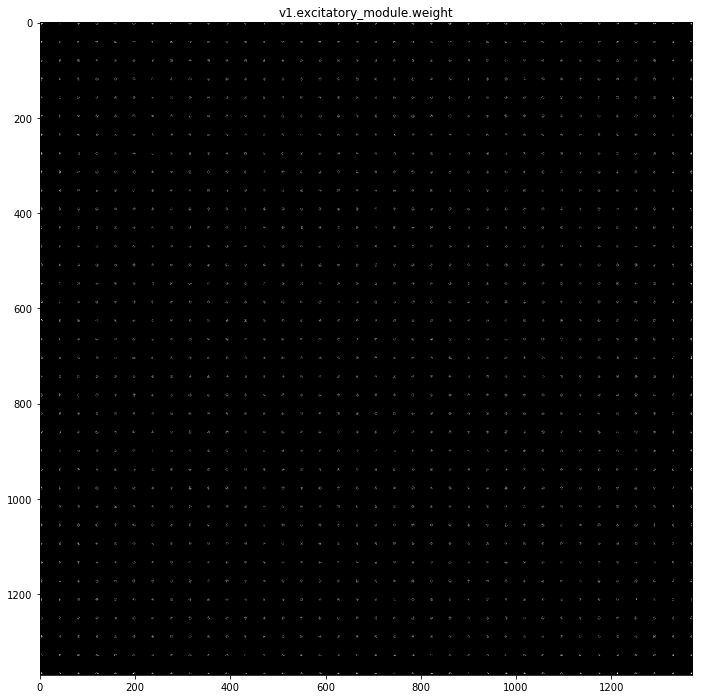

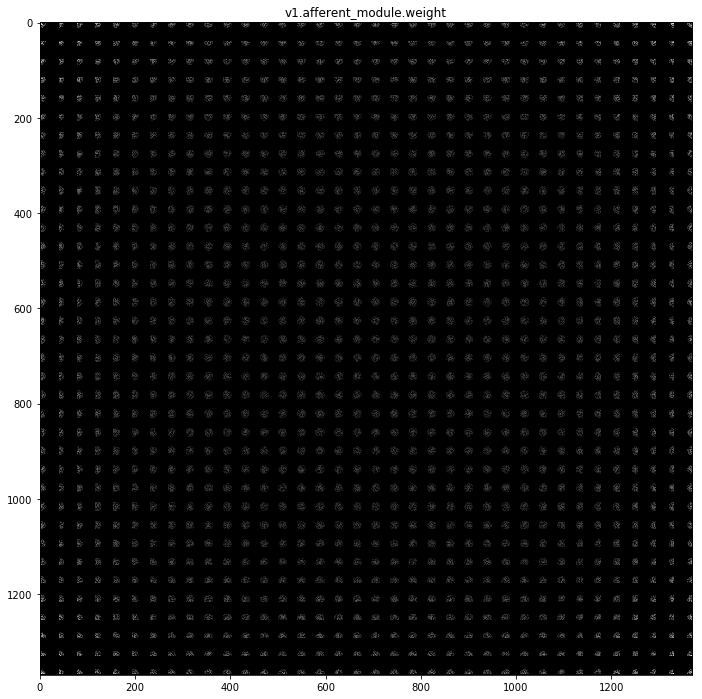

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.inhibitory_module, use_range=False, prefix='v1.inhibitory_module')
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.excitatory_module, use_range=False, prefix='v1.excitatory_module')
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.afferent_module, use_range=False, prefix='v1.afferent_module')

In [21]:
seq.step()

## Weights after training

After training, we can see that the weights of the neurons in the afferent layer where  the  Gaussian  was  inside  their  receptive  fields  follow  a  Hebbian  learning  pattern. The weights of the neurons in an inhibitory module are more similar to the activation pattern observed in V1.

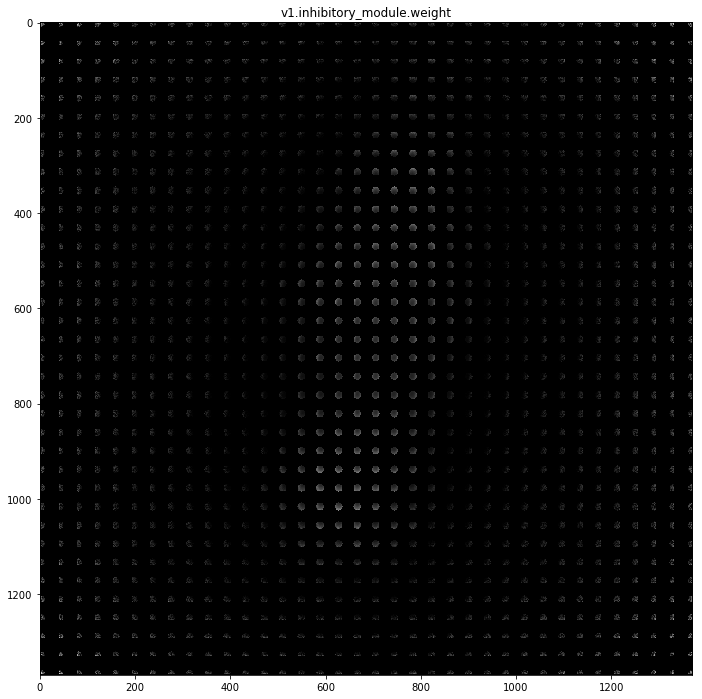

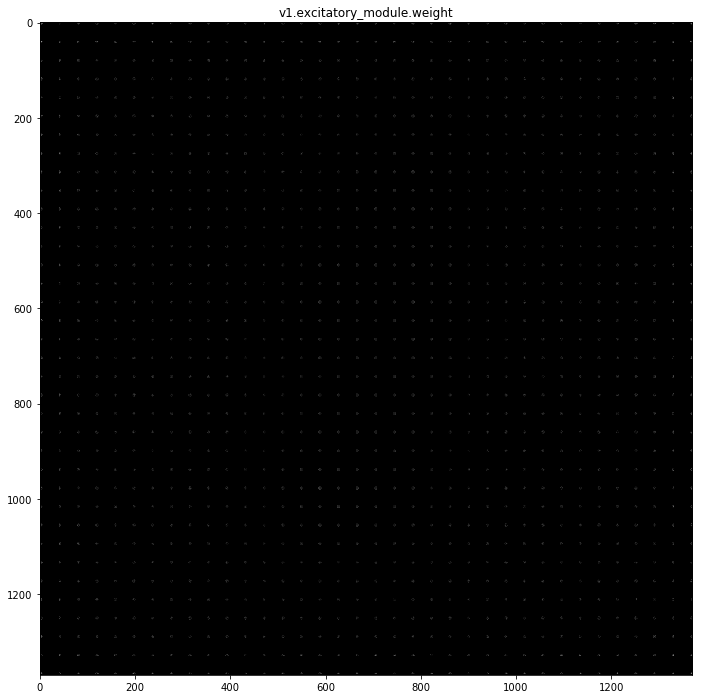

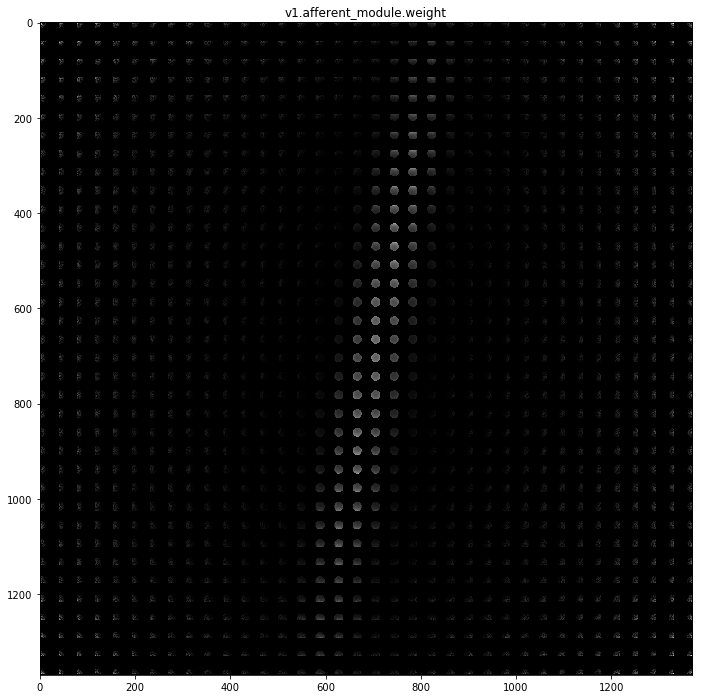

In [22]:
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.inhibitory_module, use_range=False, prefix='v1.inhibitory_module')
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.excitatory_module, use_range=False, prefix='v1.excitatory_module')
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.afferent_module, use_range=False, prefix='v1.afferent_module')